In [2]:
# 데이터 구성: Series, DataFrame
import pandas as pd

# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib; import matplotlib.pyplot as plt

# 데이터 시각화: 추세, 산점도 행렬
import seaborn as sns

# Scale 변환: 평균, 표준편차 기준
from sklearn.preprocessing import StandardScaler

# 주성분 분석
from sklearn.decomposition import PCA

# 회귀분석
import statsmodels.api as sm

from sklearn.model_selection import train_test_split


In [5]:
# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
# df_raw= pd.read_csv("/home/pirl/test/BigData/직무능력평가.csv", encoding='euc-kr')
# df_raw.head()
# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
df_raw= pd.read_csv("/home/pirl/test/BigData/IRIS.csv", encoding='euc-kr')
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df_raw["SPECIES"]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: SPECIES, Length: 150, dtype: object

In [14]:
print(df_raw.groupby('SPECIES').nunique())

            SEPAL_LENGTH  SEPAL_WIDTH  PETAL_LENGTH  PETAL_WIDTH  SPECIES
SPECIES                                                                  
setosa                15           16             9            6        1
versicolor            21           14            19            9        1
virginica             21           13            20           12        1


In [18]:
# 데이터 분리(Y, Xs) -> 설명변수를 이용한 주성분 분석
df_raw_x = df_raw.drop("SPECIES", axis = 1)
df_raw_y = df_raw["SPECIES"]

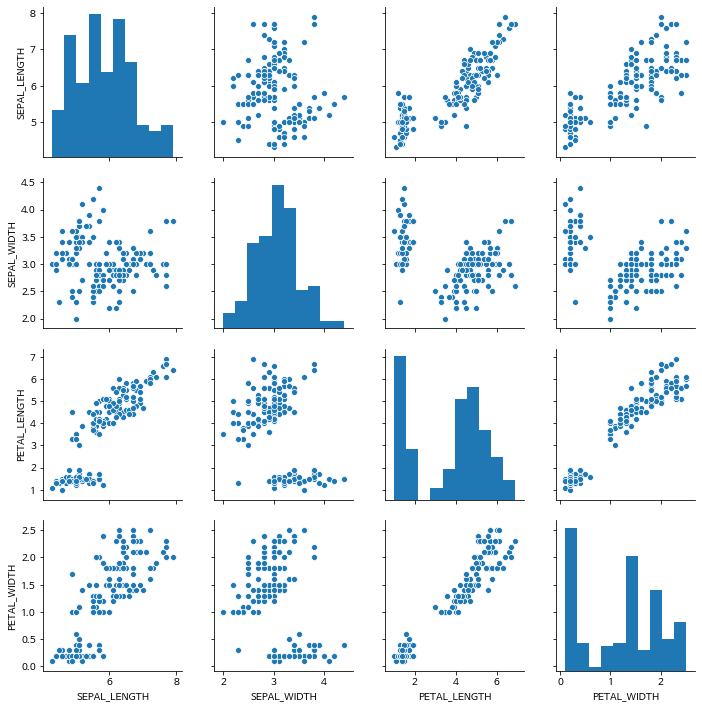

In [19]:
# 산점도 행렬
sns.pairplot(df_raw_x)

In [20]:
# Pearson 상관계수, pearson, kendall, spearman
df_raw_x.corr().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


In [21]:
# 요약 통계량 -> Scale 변환 필요 확인
df_raw_x.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [22]:
# 변수 이름 저장
x_cols = df_raw_x.columns
# Scale 변환: ndarray 형식
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
# 새로운 test data는 fit_transform(df_raw_x)이 아닌, transform(df_raw_x) 시킨다.

# 변환된 데이터 및 형태 확인
print("Scaled Data: \n{}".format(nd_scaled[:5].round(3)))
print("Shape:\n {}".format(nd_scaled.shape))

Scaled Data: 
[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape:
 (150, 4)


In [23]:
# DateFame으로 저장
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.901,1.019,-1.340,-1.315
1,-1.143,-0.132,-1.340,-1.315
2,-1.385,0.328,-1.397,-1.315
3,-1.507,0.098,-1.283,-1.315
4,-1.022,1.249,-1.340,-1.315


In [24]:
# Scaled 변환 데이터 요약 통계량
df_scaled.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


### step 4 주성분 분석

In [26]:
# 주성분 분석: 주성분1(Prin1) ~ 주성분6(Prin6) 생성 및 저장
pca = PCA(n_components = 4)
nd_pca = pca.fit_transform(df_scaled)
# 생성된 주성분 점수 확인
print("PCA DATA :\n {}".format(nd_pca[:3]))
# 생성된 주성분 점수 Row, Column 개수 확인
print("Shape :\n {}".format(nd_pca.shape))# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
# df_raw= pd.read_csv("/home/pirl/test/BigData/직무능력평가.csv", encoding='euc-kr')
# df_raw.head()
# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
test= pd.read_csv("/home/pirl/test/BigData/jik.csv", encoding='euc-kr')
test.head()

PCA DATA :
 [[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]]
Shape :
 (150, 4)


,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,42,41,20,49,51,52,35
1,53,74,61,54,33,63,57
2,61,10,66,63,66,36,48


### 주성분 분석 및 결과: 주성분 점수

In [28]:
# 주성분 점수 저장:(Prin1~Prin6, DataFrame형식) 및 확인
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1","Prin2","Prin3","Prin4"])
# 주성분 분석용 데이터와 주성분 점수 
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,Prin1,Prin2,Prin3,Prin4
0,-0.900681,1.019004,-1.340227,-1.315444,-2.264703,0.480027,-0.127706,-0.024168
1,-1.143017,-0.131979,-1.340227,-1.315444,-2.080961,-0.674134,-0.234609,-0.103007
2,-1.385353,0.328414,-1.397064,-1.315444,-2.364229,-0.341908,0.044201,-0.028377
3,-1.506521,0.098217,-1.283389,-1.315444,-2.299384,-0.597395,0.091290,0.065956
4,-1.021849,1.249201,-1.340227,-1.315444,-2.389842,0.646835,0.015738,0.035923


In [33]:
### 주성분 분석 및 결과: 고유값(Eigenvalue): 확인 및 주성분 개수 결정
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [I for I in range(1,5)]
df_pca_stat["EignenValues"] = pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EignenValues,EigenValueRatio,CumEigenValueRatio
0,1,2.938,0.730,0.730
1,2,0.920,0.229,0.958
2,3,0.148,0.037,0.995
3,4,0.021,0.005,1.000


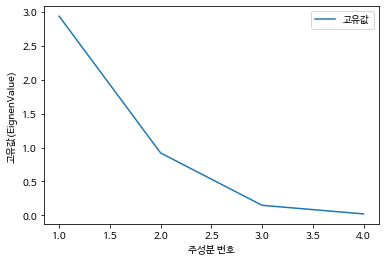

In [34]:
# Scree Plot
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["EignenValues"], label ="고유값" )

# 그래프 label, legend 설정
plt.ylabel("고유값(EignenValue)")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

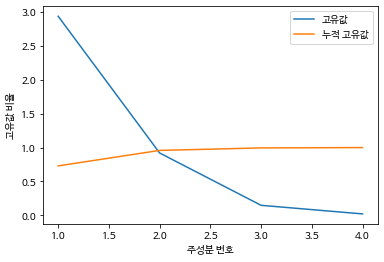

In [35]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"],
         df_pca_stat["EignenValues"], label ="고유값" )
# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"],
         df_pca_stat["CumEigenValueRatio"], label ="누적 고유값" )
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

### 주성분 분석 및 결과: 고유 벡터(Eignvector) 확인 및 해석

In [37]:
# 주성분 분석 데이터의 변수 이름
x_cols = pd.DataFrame({"Feature": df_raw_x.columns})
# 주성분 Prin 1~6까지의 고유벡터 저장
# 전치 결과 pd.DataFrame(pca.components_, columns = ["Prin1", "Prin2", "Prin3","Prin4", "Prin5", "Prin6" ], axis = 1)
# 파이썬 PCA 분석 시 SVD 연산 방식의 차이 반영
df_eignenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, \
                                                 columns = ["Prin1", "Prin2", "Prin3", "Prin4"])], axis = 1)
df_eignenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,-0.521,-0.377,0.720,0.261
1,SEPAL_WIDTH,0.269,-0.923,-0.244,-0.124
2,PETAL_LENGTH,-0.580,-0.024,-0.142,-0.801
3,PETAL_WIDTH,-0.565,-0.067,-0.634,0.524
